In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from seaborn import set_style
import kagglehub
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
set_style("whitegrid")

In [2]:
dst_stocks = pd.read_csv('DST_Finance_Stocks.csv')
weekend_stocks = pd.read_csv('Weekends_Finance_Stocks.csv')

In [3]:
dst_stocks['return'] = (dst_stocks['mon_open']-dst_stocks['fri_close'])/dst_stocks['fri_close']
weekend_stocks['return'] = (weekend_stocks['mon_open']-weekend_stocks['fri_close'])/weekend_stocks['fri_close']
dst_stocks['mon_range'] = (dst_stocks['mon_high']-dst_stocks['mon_low'])/dst_stocks['mon_low']
dst_stocks['fri_range'] = (dst_stocks['fri_high']-dst_stocks['fri_low'])/dst_stocks['fri_low']
weekend_stocks['mon_range'] = (weekend_stocks['mon_high']-weekend_stocks['mon_low'])/weekend_stocks['mon_low']
weekend_stocks['fri_range'] = (weekend_stocks['fri_high']-weekend_stocks['fri_low'])/weekend_stocks['fri_low']

dst_stocks['y'] = 1
weekend_stocks['y'] = 0

In [ ]:
#multivariable_fit_input = pd.DataFrame()
#multivariable_fit_input['y'] = pd.concat([dst_stocks['y'],weekend_stocks['y']])
#multivariable_fit_input['return'] = pd.concat([dst_stocks['return'],weekend_stocks['return']])
#multivariable_fit_input['mon_volume'] = pd.concat([dst_stocks['mon_volume'],weekend_stocks['mon_volume']])
#multivariable_fit_input['fri_volume'] = pd.concat([dst_stocks['fri_volume'],weekend_stocks['fri_volume']])
#multivariable_fit_input['mon_range'] = pd.concat([dst_stocks['mon_range'],weekend_stocks['mon_range']])
#multivariable_fit_input['fri_range'] = pd.concat([dst_stocks['fri_range'],weekend_stocks['fri_range']])
#multivariable_fit_input = multivariable_fit_input.sample(frac=1).reset_index()

#split80 = int(multivariable_fit_input.shape[0]*0.8)-1
#multivariable_fit_train = multivariable_fit_input[:split80]
#multivariable_fit_test = multivariable_fit_input[split80:]

In [4]:
dst_stocks = dst_stocks.sample(frac=1).reset_index()
dst_stocks_fall = dst_stocks[dst_stocks['Season']=='Fall']
dst_stocks_spring = dst_stocks[dst_stocks['Season']=='Spring']
weekend_stocks = weekend_stocks.sample(frac=1).reset_index()

split80_dst = int(dst_stocks.shape[0]*0.8)-1
split80_dst_fall = int(dst_stocks_fall.shape[0]*0.8)-1
split80_dst_spring = int(dst_stocks_spring.shape[0]*0.8)-1
split80_wkd = int(weekend_stocks.shape[0]*0.8)-1

dst_train = dst_stocks[:split80_dst]
dst_test = dst_stocks[split80_dst:]
dst_fall_train = dst_stocks_fall[:split80_dst_fall]
dst_fall_test = dst_stocks_fall[split80_dst_fall:]
dst_spring_train = dst_stocks_spring[:split80_dst_spring]
dst_spring_test = dst_stocks_spring[split80_dst_spring:]
weekend_train = weekend_stocks[:split80_wkd]
weekend_test = weekend_stocks[split80_wkd:]

In [7]:
multivariable_fit_train = pd.DataFrame()
multivariable_fit_train['y'] = pd.concat([dst_train['y'],weekend_train['y']])
multivariable_fit_train['return'] = pd.concat([dst_train['return'],weekend_train['return']])
multivariable_fit_train['mon_volume'] = pd.concat([dst_train['mon_volume'],weekend_train['mon_volume']])
multivariable_fit_train['fri_volume'] = pd.concat([dst_train['fri_volume'],weekend_train['fri_volume']])
multivariable_fit_train['mon_range'] = pd.concat([dst_train['mon_range'],weekend_train['mon_range']])
multivariable_fit_train['fri_range'] = pd.concat([dst_train['fri_range'],weekend_train['fri_range']])
multivariable_fit_train = multivariable_fit_train.sample(frac=1).reset_index()

In [8]:
X = np.concatenate([multivariable_fit_train[['return']].values,multivariable_fit_train[['mon_volume']].values,multivariable_fit_train[['fri_volume']].values,multivariable_fit_train[['mon_range']].values, multivariable_fit_train[['fri_range']].values],axis=-1)
y = multivariable_fit_train['y'].values
X.shape

(431339, 5)

In [9]:
X_noVolume = np.concatenate([multivariable_fit_train[['return']].values,multivariable_fit_train[['mon_range']].values, multivariable_fit_train[['fri_range']].values],axis=-1)

In [10]:
multivariable_fit_test = pd.DataFrame()
multivariable_fit_test['y'] = pd.concat([dst_test['y'],weekend_test['y']])
multivariable_fit_test['return'] = pd.concat([dst_test['return'],weekend_test['return']])
multivariable_fit_test['mon_volume'] = pd.concat([dst_test['mon_volume'],weekend_test['mon_volume']])
multivariable_fit_test['fri_volume'] = pd.concat([dst_test['fri_volume'],weekend_test['fri_volume']])
multivariable_fit_test['mon_range'] = pd.concat([dst_test['mon_range'],weekend_test['mon_range']])
multivariable_fit_test['fri_range'] = pd.concat([dst_test['fri_range'],weekend_test['fri_range']])
multivariable_fit_test = multivariable_fit_test.sample(frac=1).reset_index()

In [11]:
X_test = np.concatenate([multivariable_fit_test[['return']].values,multivariable_fit_test[['mon_volume']].values,multivariable_fit_test[['fri_volume']].values,multivariable_fit_test[['mon_range']].values, multivariable_fit_test[['fri_range']].values],axis=-1)
y_test = multivariable_fit_test['y'].values
X_test.shape

(107838, 5)

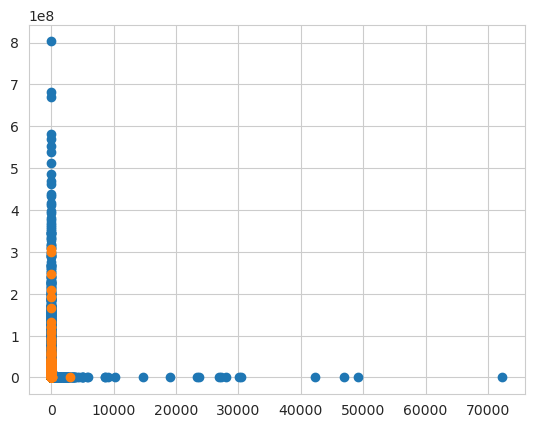

In [10]:
plt.clf()
plt.scatter(weekend_stocks['return'],weekend_stocks['mon_volume'])
plt.scatter(dst_stocks['return'],dst_stocks['mon_volume'])
plt.show()

In [34]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
                                n_estimators=100,
                                algorithm = 'SAMME.R',
                                learning_rate = 0.5,
                                random_state=123)
ada_clf.fit(X,y)

/home/hava/Apps/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=123)

In [35]:
prob_test_dst = ada_clf.predict_proba(np.concatenate([dst_test[['return']].values,dst_test[['mon_volume']].values,dst_test[['fri_volume']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
prob_test_wkd = ada_clf.predict_proba(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_volume']].values,weekend_test[['fri_volume']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))
pred_test_dst = ada_clf.predict(np.concatenate([dst_test[['return']].values,dst_test[['mon_volume']].values,dst_test[['fri_volume']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
pred_test_wkd = ada_clf.predict(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_volume']].values,weekend_test[['fri_volume']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))

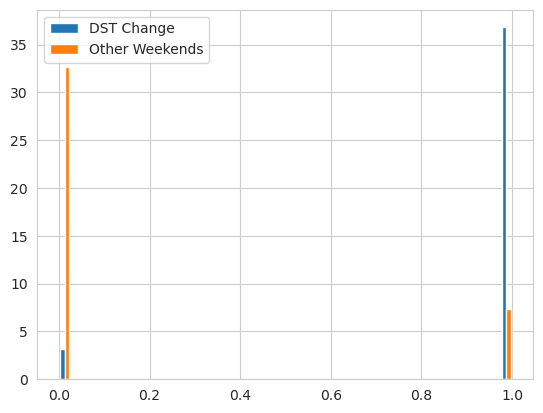

In [36]:
plt.clf()

#plt.hist([prob_test_dst[:,1],prob_test_wkd[:,1]], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.hist([pred_test_dst,pred_test_wkd], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.legend()

plt.show()

In [37]:
print('DST Accuracy: ', pred_test_dst.sum()/len(pred_test_dst)*100.,'%')
print('Non-DST Accuracy: ', (len(pred_test_wkd) - pred_test_wkd.sum())/len(pred_test_wkd)*100.,'%')

DST Accuracy:  92.04470742932281 %
Non-DST Accuracy:  81.64996368917937 %


In [12]:
ada_noVolume = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
                                n_estimators=100,
                                algorithm = 'SAMME.R',
                                learning_rate = 0.5,
                                random_state=123)
ada_noVolume.fit(X_noVolume,y)

/home/hava/Apps/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=123)

In [26]:
prob_noVol_test_dst = ada_noVolume.predict_proba(np.concatenate([dst_test[['return']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
prob_noVol_test_wkd = ada_noVolume.predict_proba(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))
pred_noVol_test_dst = ada_noVolume.predict(np.concatenate([dst_test[['return']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
pred_noVol_test_wkd = ada_noVolume.predict(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))

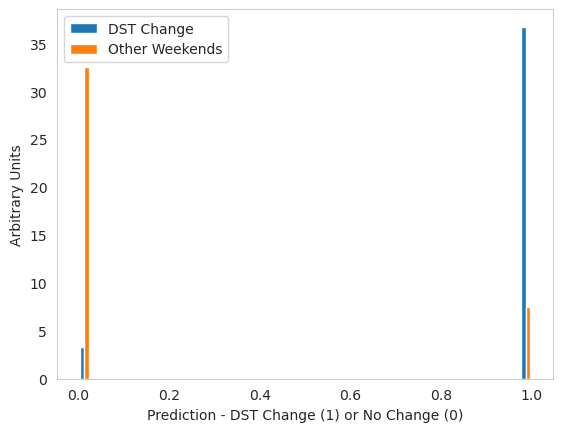

In [69]:
plt.clf()
plt.grid(False)
#plt.hist([prob_noVol_test_dst[:,1],prob_noVol_test_wkd[:,1]], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.hist([pred_noVol_test_dst,pred_noVol_test_wkd], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.legend()
plt.xlabel('Prediction - DST Change (1) or No Change (0)')
plt.ylabel('Arbitrary Units')

plt.show()

In [27]:
print('DST Accuracy: ', pred_noVol_test_dst.sum()/len(pred_noVol_test_dst)*100.,'%')
print('Non-DST Accuracy: ', (len(pred_noVol_test_wkd) - pred_noVol_test_wkd.sum())/len(pred_noVol_test_wkd)*100.,'%')

DST Accuracy:  91.80363795748411 %
Non-DST Accuracy:  81.33042846768336 %


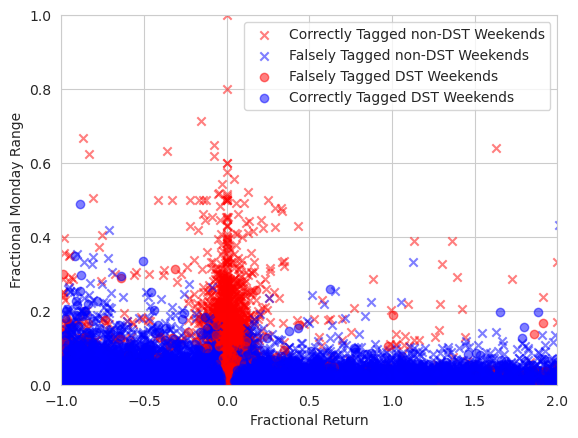

In [50]:
plt.clf()

plt.scatter(weekend_test[pred_noVol_test_wkd==0]['return'],weekend_test[pred_noVol_test_wkd==0]['mon_range'], c='red', marker='x', alpha=0.5, label='Correctly Tagged non-DST Weekends')
plt.scatter(weekend_test[pred_noVol_test_wkd==1]['return'],weekend_test[pred_noVol_test_wkd==1]['mon_range'], c='blue', marker='x', alpha=0.5, label='Falsely Tagged non-DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==0]['return'],dst_test[pred_noVol_test_dst==0]['mon_range'], c='red', alpha=0.5, label='Falsely Tagged DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==1]['return'],dst_test[pred_noVol_test_dst==1]['mon_range'], c='blue', alpha=0.5, label='Correctly Tagged DST Weekends')
#plt.scatter(X1[:,0],X1[:,1])
plt.xlim([-1,2])
plt.ylim([0,1])
plt.xlabel('Fractional Return')
plt.ylabel('Fractional Monday Range')
plt.legend()
plt.show()

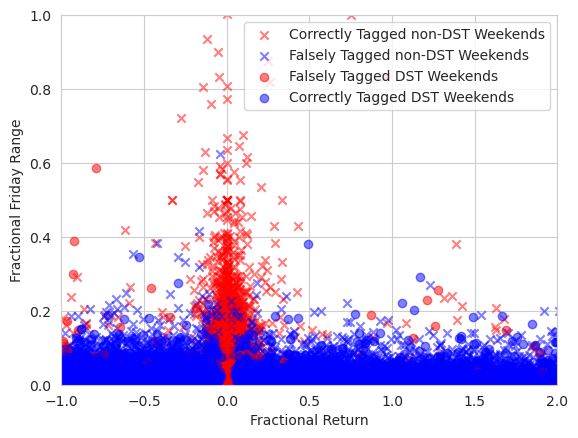

In [51]:
plt.clf()

plt.scatter(weekend_test[pred_noVol_test_wkd==0]['return'],weekend_test[pred_noVol_test_wkd==0]['fri_range'], c='red', marker='x', alpha=0.5, label='Correctly Tagged non-DST Weekends')
plt.scatter(weekend_test[pred_noVol_test_wkd==1]['return'],weekend_test[pred_noVol_test_wkd==1]['fri_range'], c='blue', marker='x', alpha=0.5, label='Falsely Tagged non-DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==0]['return'],dst_test[pred_noVol_test_dst==0]['fri_range'], c='red', alpha=0.5, label='Falsely Tagged DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==1]['return'],dst_test[pred_noVol_test_dst==1]['fri_range'], c='blue', alpha=0.5, label='Correctly Tagged DST Weekends')
#plt.scatter(X1[:,0],X1[:,1])
plt.xlim([-1,2])
plt.ylim([0,1])
plt.xlabel('Fractional Return')
plt.ylabel('Fractional Friday Range')
plt.legend()
plt.show()

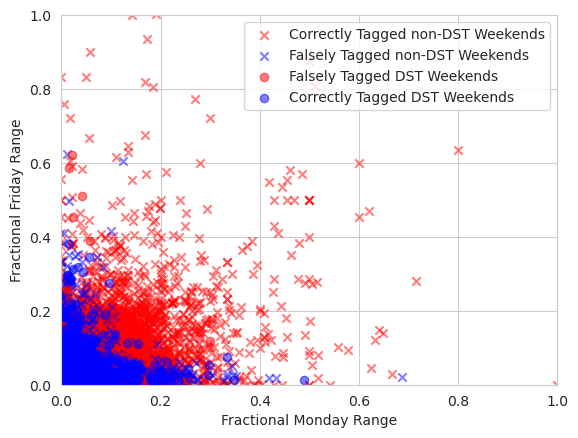

In [52]:
plt.clf()

plt.scatter(weekend_test[pred_noVol_test_wkd==0]['mon_range'],weekend_test[pred_noVol_test_wkd==0]['fri_range'], c='red', marker='x', alpha=0.5, label='Correctly Tagged non-DST Weekends')
plt.scatter(weekend_test[pred_noVol_test_wkd==1]['mon_range'],weekend_test[pred_noVol_test_wkd==1]['fri_range'], c='blue', marker='x', alpha=0.5, label='Falsely Tagged non-DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==0]['mon_range'],dst_test[pred_noVol_test_dst==0]['fri_range'], c='red', alpha=0.5, label='Falsely Tagged DST Weekends')
plt.scatter(dst_test[pred_noVol_test_dst==1]['mon_range'],dst_test[pred_noVol_test_dst==1]['fri_range'], c='blue', alpha=0.5, label='Correctly Tagged DST Weekends')
#plt.scatter(X1[:,0],X1[:,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Fractional Monday Range')
plt.ylabel('Fractional Friday Range')
plt.legend()
plt.show()

In [16]:
nikkei_stocks = pd.read_csv('Weekends_Nikkei_Stocks.csv')
nikkei_stocks

,Friday_date,Monday_date,Friday_Open,Monday_Open,Friday_High,Monday_High,Friday_Low,Monday_Low,Friday_Close,Monday_Close,y
0,1985-03-29,1985-04-01,12613.27,12609.94,12622.62,12677.15,12567.32,12600.97,12580.76,12677.15,0
1,1985-04-05,1985-04-08,12637.11,12589.15,12643.78,12635.96,12523.55,12572.27,12544.24,12635.96,0
2,1985-04-12,1985-04-15,12580.09,12597.16,12592.68,12618.99,12558.64,12552.73,12588.01,12552.73,0
3,1985-04-19,1985-04-22,12040.90,12267.73,12152.84,12278.32,11996.00,12172.29,12114.80,12179.92,0
4,1985-05-10,1985-05-13,12491.60,12569.12,12527.31,12571.80,12475.37,12531.32,12527.31,12541.53,0
...,...,...,...,...,...,...,...,...,...,...,...
1748,2024-09-27,2024-09-30,39108.27,39117.83,39829.56,39126.36,38917.98,37797.91,39829.56,37919.55,0
1749,2024-10-04,2024-10-07,38594.73,39239.92,38735.29,39560.78,38501.82,39195.93,38635.62,39332.74,0
1750,2024-10-18,2024-10-21,39092.47,38960.20,39186.64,39119.67,38893.52,38775.59,38981.75,38954.60,0
1751,2024-10-25,2024-10-28,37954.78,37757.95,38028.14,38740.17,37713.00,37757.95,37913.92,38605.53,0


In [17]:
nikkei_stocks['return'] = (nikkei_stocks['Monday_Open']-nikkei_stocks['Friday_Close'])/nikkei_stocks['Friday_Close']
nikkei_stocks['mon_range'] = (nikkei_stocks['Monday_High']-nikkei_stocks['Monday_Low'])/nikkei_stocks['Monday_Low']
nikkei_stocks['fri_range'] = (nikkei_stocks['Friday_High']-nikkei_stocks['Friday_Low'])/nikkei_stocks['Friday_Low']

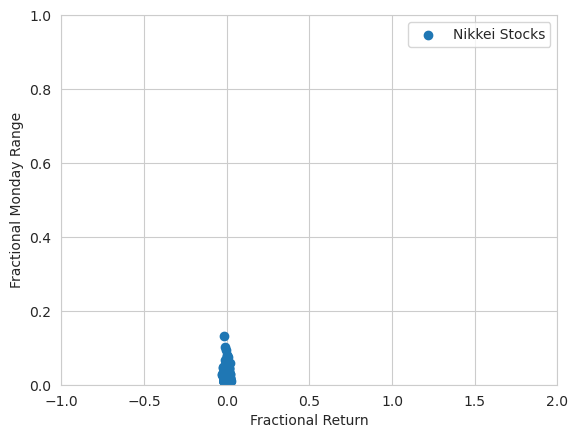

In [53]:
plt.clf()
plt.scatter(nikkei_stocks['return'], nikkei_stocks['mon_range'], label='Nikkei Stocks')
plt.xlim([-1,2])
plt.ylim([0,1])
plt.xlabel('Fractional Return')
plt.ylabel('Fractional Monday Range')
plt.legend()
plt.show()

In [21]:
nikkei_dst = nikkei_stocks[nikkei_stocks['y']==1].reset_index()
nikkei_wkd = nikkei_stocks[nikkei_stocks['y']==0].reset_index()
print(len(nikkei_dst))
print(len(nikkei_wkd))

72
1681


In [23]:
prob_nikkei_dst = ada_noVolume.predict_proba(np.concatenate([nikkei_dst[['return']].values,nikkei_dst[['mon_range']].values, nikkei_dst[['fri_range']].values],axis=-1))
prob_nikkei_wkd = ada_noVolume.predict_proba(np.concatenate([nikkei_wkd[['return']].values,nikkei_wkd[['mon_range']].values, nikkei_wkd[['fri_range']].values],axis=-1))
pred_nikkei_dst = ada_noVolume.predict(np.concatenate([nikkei_dst[['return']].values,nikkei_dst[['mon_range']].values, nikkei_dst[['fri_range']].values],axis=-1))
pred_nikkei_wkd = ada_noVolume.predict(np.concatenate([nikkei_wkd[['return']].values,nikkei_wkd[['mon_range']].values, nikkei_wkd[['fri_range']].values],axis=-1))

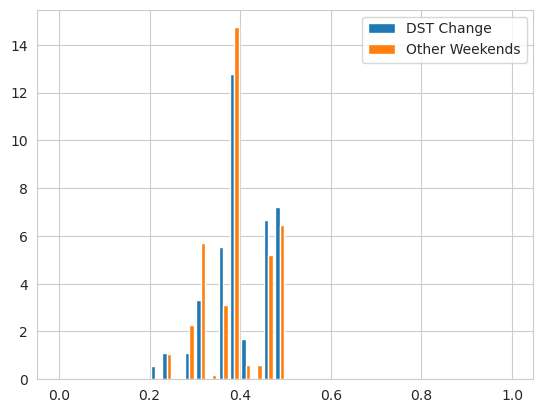

In [32]:
plt.clf()

plt.hist([prob_nikkei_dst[:,1],prob_nikkei_wkd[:,1]], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
#plt.hist([pred_nikkei_dst,pred_nikkei_wkd], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.legend()

plt.show()

In [33]:
print('Nikkei DST Accuracy: ', pred_nikkei_dst.sum()/len(pred_nikkei_dst)*100.,'%')
print('Nikkei Non-DST Accuracy: ', (len(pred_nikkei_wkd) - pred_nikkei_wkd.sum())/len(pred_nikkei_wkd)*100.,'%')

Nikkei DST Accuracy:  0.0 %
Nikkei Non-DST Accuracy:  99.94051160023795 %


In [54]:
japan_dst = pd.read_csv('DST_Japan_Stocks.csv')
japan_wkd = pd.read_csv('Weekends_Japan_Stocks.csv')

In [59]:
japan_dst['return'] = (japan_dst['mon_open']-japan_dst['fri_close'])/japan_dst['fri_close']
japan_dst['mon_range'] = (japan_dst['mon_high']-japan_dst['mon_low'])/japan_dst['mon_low']
japan_dst['fri_range'] = (japan_dst['fri_high']-japan_dst['fri_low'])/japan_dst['fri_low']
japan_wkd['return'] = (japan_wkd['mon_open']-japan_wkd['fri_close'])/japan_wkd['fri_close']
japan_wkd['mon_range'] = (japan_wkd['mon_high']-japan_wkd['mon_low'])/japan_wkd['mon_low']
japan_wkd['fri_range'] = (japan_wkd['fri_high']-japan_wkd['fri_low'])/japan_wkd['fri_low']

In [63]:
prob_japan_dst = ada_noVolume.predict_proba(np.concatenate([japan_dst[['return']].values,japan_dst[['mon_range']].values, japan_dst[['fri_range']].values],axis=-1))
prob_japan_wkd = ada_noVolume.predict_proba(np.concatenate([japan_wkd[['return']].values,japan_wkd[['mon_range']].values, japan_wkd[['fri_range']].values],axis=-1))
pred_japan_dst = ada_noVolume.predict(np.concatenate([japan_dst[['return']].values,japan_dst[['mon_range']].values, japan_dst[['fri_range']].values],axis=-1))
pred_japan_wkd = ada_noVolume.predict(np.concatenate([japan_wkd[['return']].values,japan_wkd[['mon_range']].values, japan_wkd[['fri_range']].values],axis=-1))

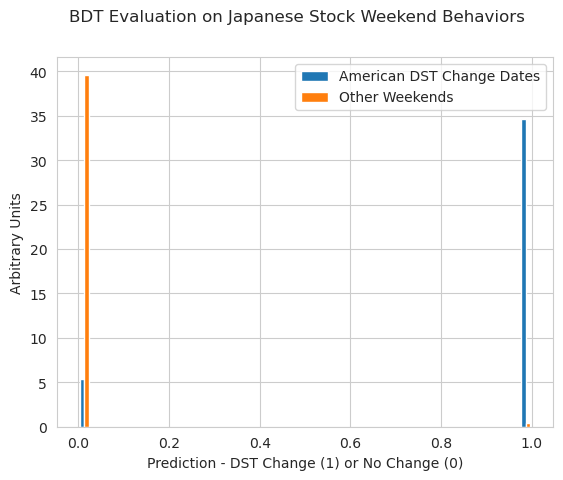

In [71]:
plt.clf()

#plt.hist([prob_japan_dst[:,1],prob_japan_wkd[:,1]], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.hist([pred_japan_dst,pred_japan_wkd], range=[0.0,1.0], bins=40, density=True, label=['American DST Change Datesjapanese financial stock integers','Other Weekends'])
plt.legend()
plt.xlabel('Prediction - DST Change (1) or No Change (0)')
plt.ylabel('Arbitrary Units')
plt.suptitle('BDT Evaluation on Japanese Stock Weekend Behaviors')
plt.show()

In [62]:
print('Japan DST Accuracy: ', pred_japan_dst.sum()/len(pred_japan_dst)*100.,'%')
print('Japan Non-DST Accuracy: ', (len(pred_japan_wkd) - pred_japan_wkd.sum())/len(pred_japan_wkd)*100.,'%')

Japan DST Accuracy:  86.45598194130926 %
Japan Non-DST Accuracy:  99.03620969194739 %


In [ ]:
fall_fit_train = pd.DataFrame()
fall_fit_train['y'] = pd.concat([dst_fall_train['y'],weekend_train['y']])
fall_fit_train['return'] = pd.concat([dst_fall_train['return'],weekend_train['return']])
fall_fit_train['mon_volume'] = pd.concat([dst_fall_train['mon_volume'],weekend_train['mon_volume']])
fall_fit_train['fri_volume'] = pd.concat([dst_fall_train['fri_volume'],weekend_train['fri_volume']])
fall_fit_train['mon_range'] = pd.concat([dst_fall_train['mon_range'],weekend_train['mon_range']])
fall_fit_train['fri_range'] = pd.concat([dst_fall_train['fri_range'],weekend_train['fri_range']])
fall_fit_train = fall_fit_train.sample(frac=1).reset_index()

In [ ]:
X_fall = np.concatenate([fall_fit_train[['return']].values,fall_fit_train[['mon_volume']].values,fall_fit_train[['fri_volume']].values,fall_fit_train[['mon_range']].values, fall_fit_train[['fri_range']].values],axis=-1)
y_fall = fall_fit_train['y'].values